# Bot classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn import model_selection, linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

import missingno as msno

/Users/Lorenzo/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
full = pd.read_csv('data/full/train.csv')

## Data exploration

In [3]:
full.describe()

,avg_fav,avg_hash,avg_len,avg_ret,contributors_enabled,default_profile,default_profile_image,fake_words_score,favourites_count,follow_request_sent,...,ret_perc,spam_words_score,statuses_count,target,tweet_intradistance,url_intradistance,url_perc,user_id,utc_offset,verified
count,25640.000000,25640.000000,25640.000000,25640.000000,18815.0,22881.000000,18834.000000,25640.000000,25640.000000,18815.0,...,25640.000000,25640.000000,2.564000e+04,25640.000000,25640.000000,25640.000000,25640.000000,2.564000e+04,2810.000000,18826.000000
mean,6.610835,0.190830,58.422766,1511.855264,0.0,0.709584,0.053308,0.023964,5888.202340,0.0,...,0.246851,0.031035,1.115940e+04,1.859360,7.599940,1.968377,0.132881,1.782175e+17,-4889.145907,0.004621
std,457.934517,0.488714,52.522072,5398.952052,0.0,0.453964,0.224653,0.063482,26113.194008,0.0,...,0.360419,0.049565,4.167535e+04,1.418054,6.093964,2.621330,0.232582,3.676792e+17,22037.451204,0.067824
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.780330e+05,-39600.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,2.100000e+01,0.000000,0.000000,0.000000,0.000000,4.099121e+08,-25200.000000,0.000000
50%,0.000000,0.040404,66.970000,0.047059,0.0,1.000000,0.000000,0.013552,80.500000,0.0,...,0.000000,0.015500,9.100000e+01,2.000000,10.738526,0.000000,0.000000,1.434536e+09,-14400.000000,0.000000
75%,0.090909,0.206615,93.282591,778.775000,0.0,1.000000,0.000000,0.026403,492.000000,0.0,...,0.512821,0.043259,3.253250e+03,3.000000,12.236601,3.526084,0.170000,2.927803e+09,13500.000000,0.000000
max,71540.120000,17.000000,373.390000,247147.066667,0.0,1.000000,1.000000,1.855191,913239.000000,0.0,...,1.000000,0.898990,1.418488e+06,4.000000,27.574898,10.090432,1.000000,1.036369e+18,46800.000000,1.000000


Delete naive features 

In [4]:
full = full.drop(columns=['contributors_enabled', 'follow_request_sent', 'following', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_image_url', 'profile_image_url_https', 'time_zone', 'utc_offset'])

plot missing values

In [5]:
features = full.columns

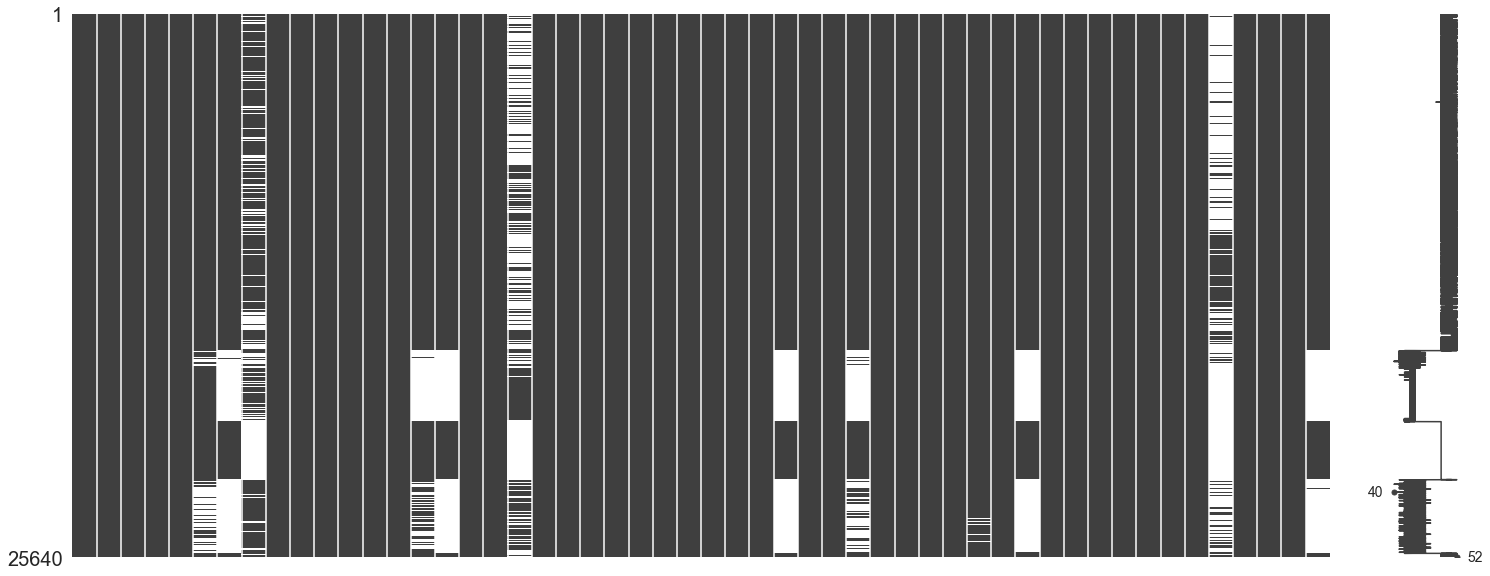

In [6]:
msno.matrix(full)

plot missing values for each target

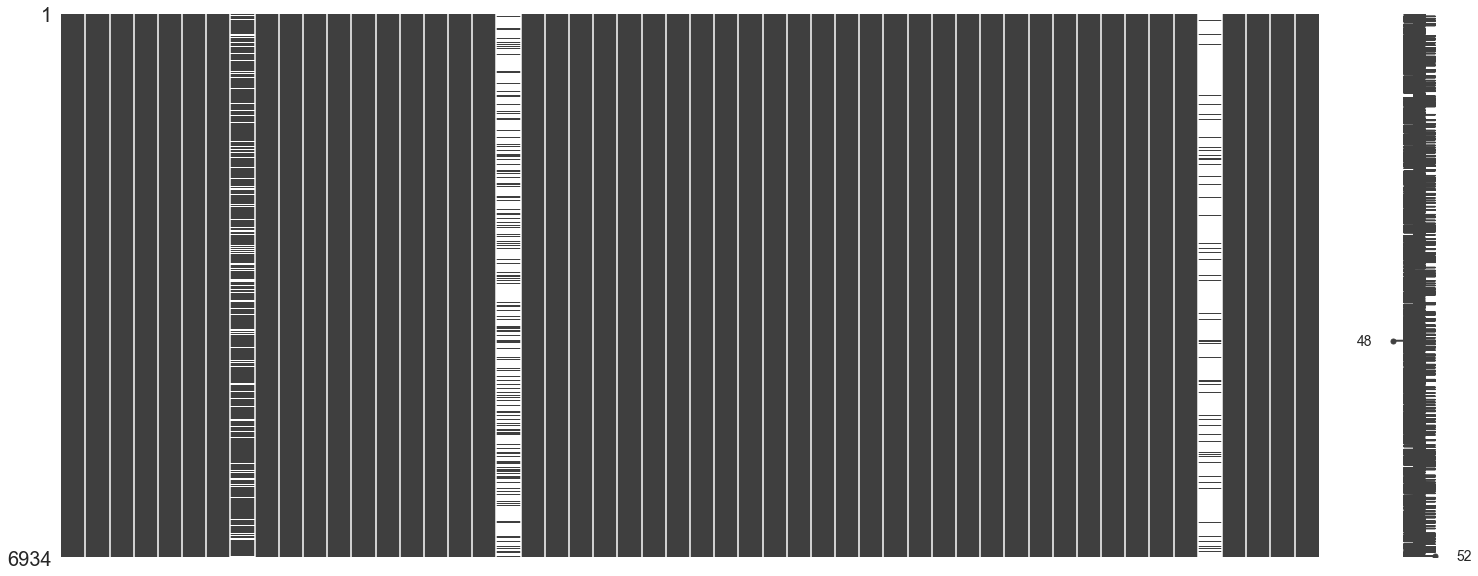

In [7]:
msno.matrix(full[full.target==0])

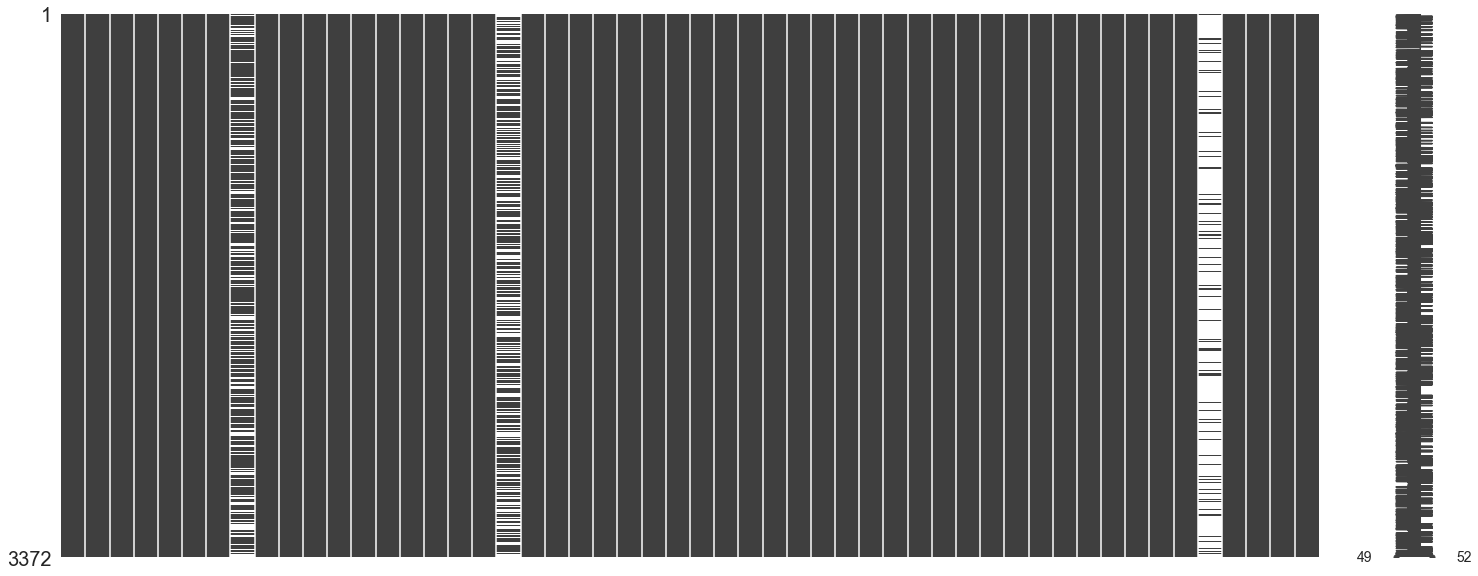

In [8]:
msno.matrix(full[full.target==1])

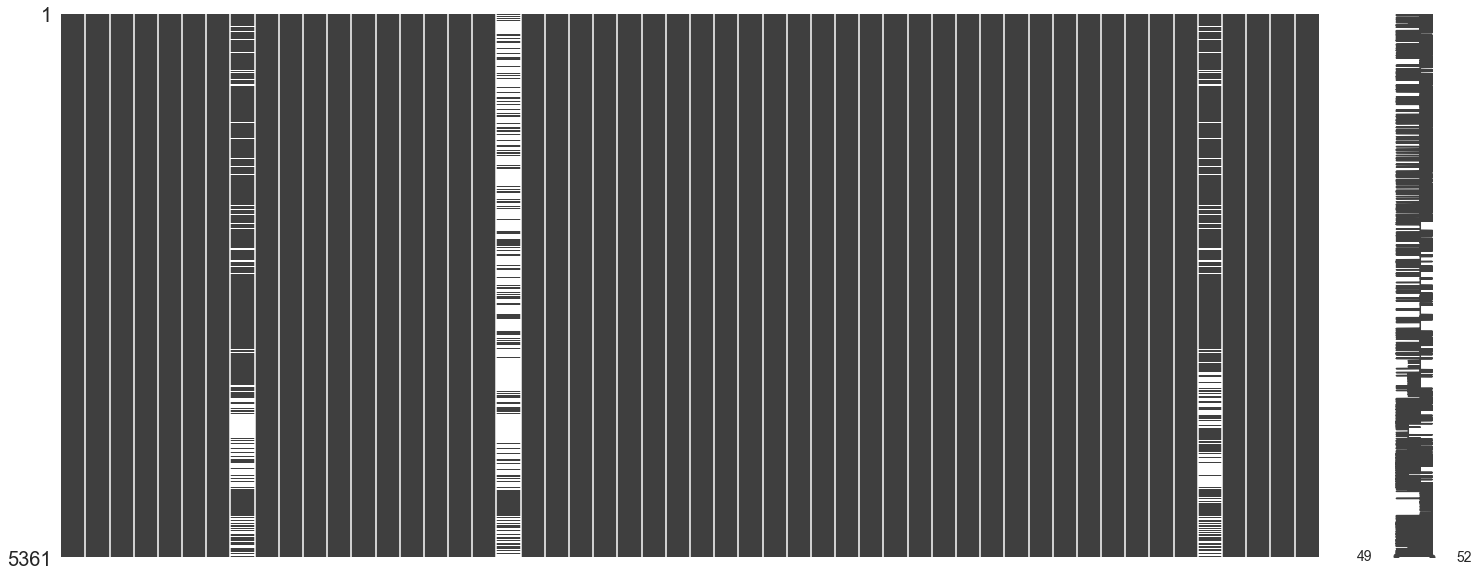

In [9]:
msno.matrix(full[full.target==2])

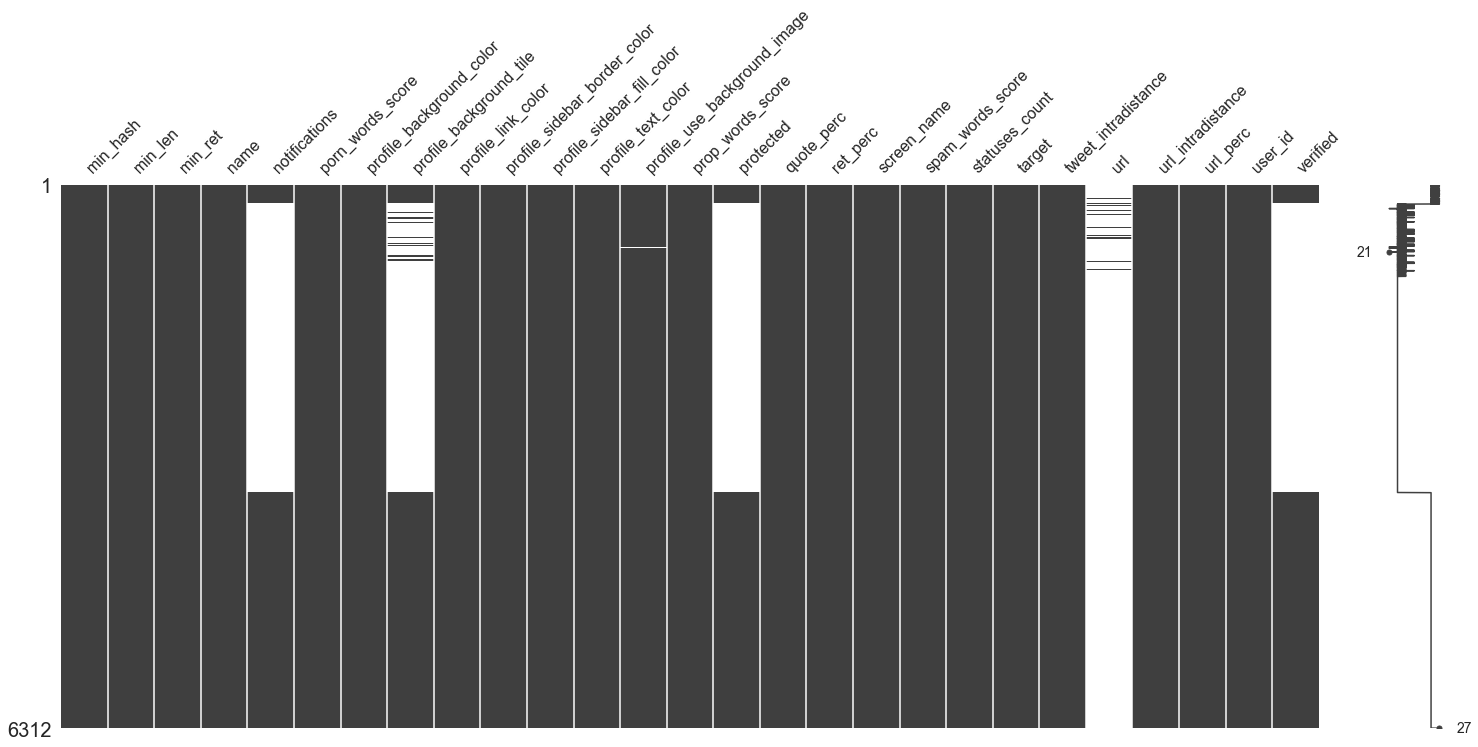

In [10]:
msno.matrix(full[full.target==3][features[25:]])

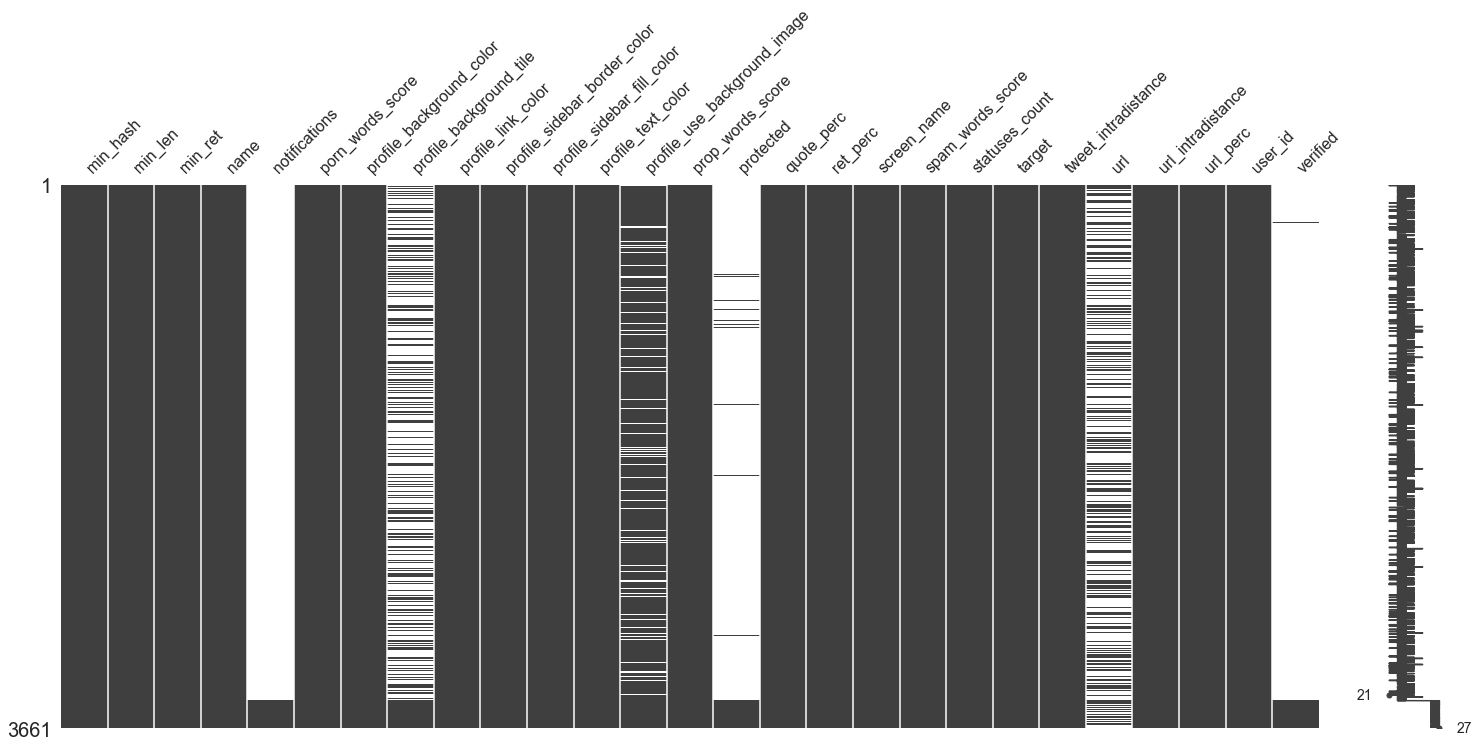

In [11]:
msno.matrix(full[full.target==4][features[25:]])

Remove features with too many missing values for some target

In [88]:
full = full.drop(columns=['default_profile_image','is_translator', 'geo_enabled', 'location', 'notifications', 'profile_background_tile', 'protected', 'verified'])